# Analysis

In [1]:
using DrWatson
using DataFrames, DataFramesMeta
# this is necessary to access collect_results!
@quickactivate "IDsHybridSimulation"

In [2]:
using FileIO
using UUIDs
add_format(format"JSON",(),".json", [:JSON])

:JSON

In [87]:
include(srcdir("WarpX.jl", "WarpX.jl"))

plot_overview_ts (generic function with 1 method)

In [118]:
results = collect_results()

┌ Info: Scanning folder /Users/zijin/projects/swd_simulation/data for result files.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/qmLuV/src/result_collection.jl:115
┌ Info: Added 10 entries.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/qmLuV/src/result_collection.jl:191


Row,dim,beta,theta,plasma_resistivity,wave_length,Te_norm,path,df
,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?,DataFrame
1,1,0.25,60.0,100.0,64.0,0.1,/Users/zijin/projects/swd_simulation/data/dim=1_beta=0.25_theta=60_plasma_resistivity=100_wave_length=64_Te_norm=0.1/sim_parameters.json,12928×56 DataFrame
2,1,0.25,60.0,100.0,64.0,1.0,/Users/zijin/projects/swd_simulation/data/dim=1_beta=0.25_theta=60_plasma_resistivity=100_wave_length=64_Te_norm=1/sim_parameters.json,12928×56 DataFrame
3,1,0.25,60.0,100.0,64.0,10.0,/Users/zijin/projects/swd_simulation/data/dim=1_beta=0.25_theta=60_plasma_resistivity=100_wave_length=64_Te_norm=10/sim_parameters.json,12928×56 DataFrame
4,1,0.25,0.0,100.0,missing,missing,/Users/zijin/projects/swd_simulation/data/dim_1_beta_0.25_theta_0.0_eta_100.0/sim_parameters.json,25856×53 DataFrame
5,1,0.25,0.0,200.0,missing,missing,/Users/zijin/projects/swd_simulation/data/dim_1_beta_0.25_theta_0.0_eta_200.0/sim_parameters.json,256256×53 DataFrame
6,1,0.25,60.0,10.0,missing,missing,/Users/zijin/projects/swd_simulation/data/dim_1_beta_0.25_theta_60.0_eta_10.0/sim_parameters.json,25856×53 DataFrame
7,1,0.25,60.0,100.0,missing,missing,/Users/zijin/projects/swd_simulation/data/dim_1_beta_0.25_theta_60.0_eta_100.0_l_32.0/sim_parameters.json,12928×53 DataFrame
8,1,2.0,0.0,200.0,missing,missing,/Users/zijin/projects/swd_simulation/data/dim_1_beta_2.0_theta_0.0_eta_200.0/sim_parameters.json,16128×53 DataFrame
9,1,2.0,60.0,10.0,missing,missing,/Users/zijin/projects/swd_simulation/data/dim_1_beta_2.0_theta_60.0_eta_10.0/sim_parameters.json,25856×53 DataFrame


In [119]:
function title(row)
    @unpack beta, theta, Te_norm, wave_length = row
    title = L"\beta=%$(beta), \theta=%$(theta), T_e=%$(Te_norm)T_{ion}, \lambda=%$(wave_length)"
    return title
end

function plot_fields_row(row, field; kwargs...)
    fg =  plot_fields(row["df"], field; kwargs...)
    figure = fg.figure

    figure[0, :] = Label(figure, title(row), fontsize = 24)
    return figure
end

plot_fields_row (generic function with 1 method)

In [120]:
figs = plot_fields_row.(eachrow(results), "Λ_temp_log"; vargs=(colormap=:balance,), func=Λ_renamer)

10-element Vector{Figure}:
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()

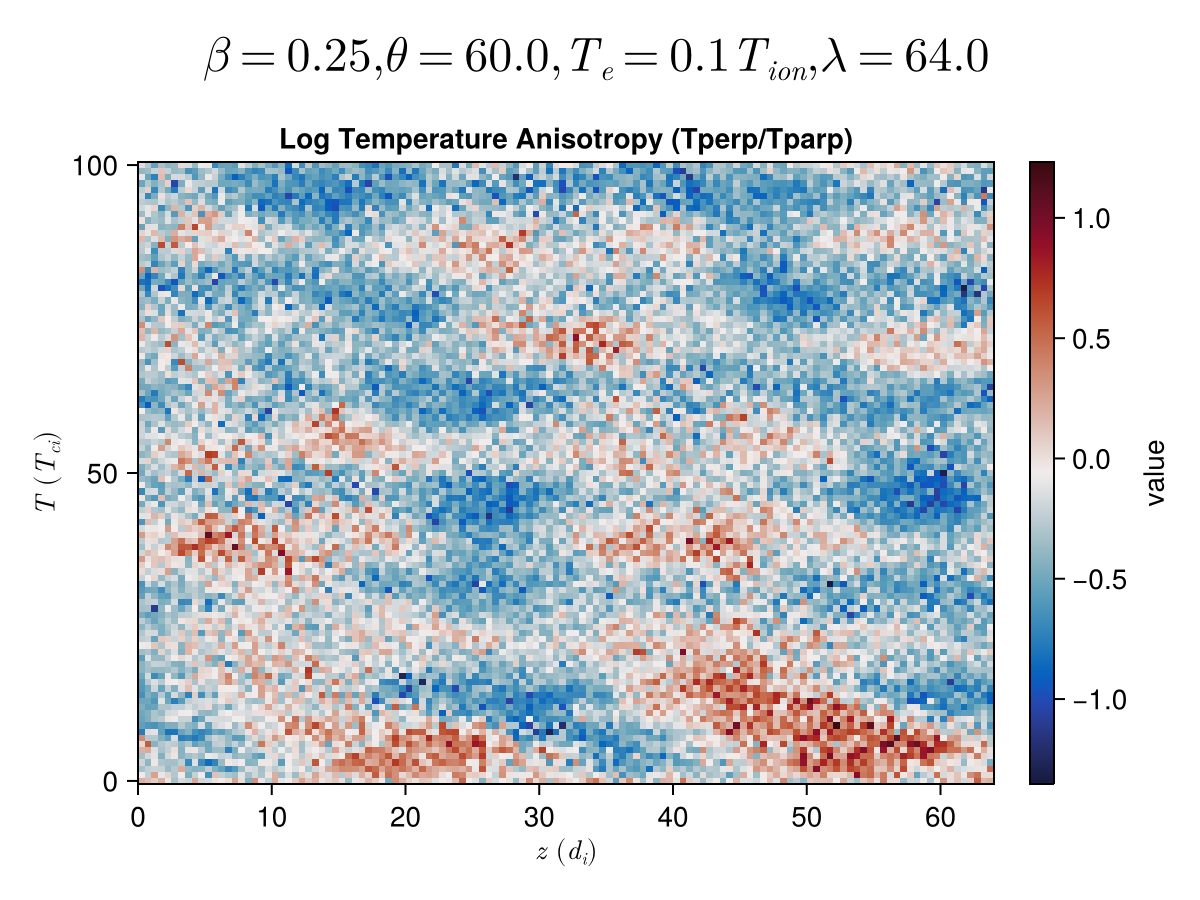

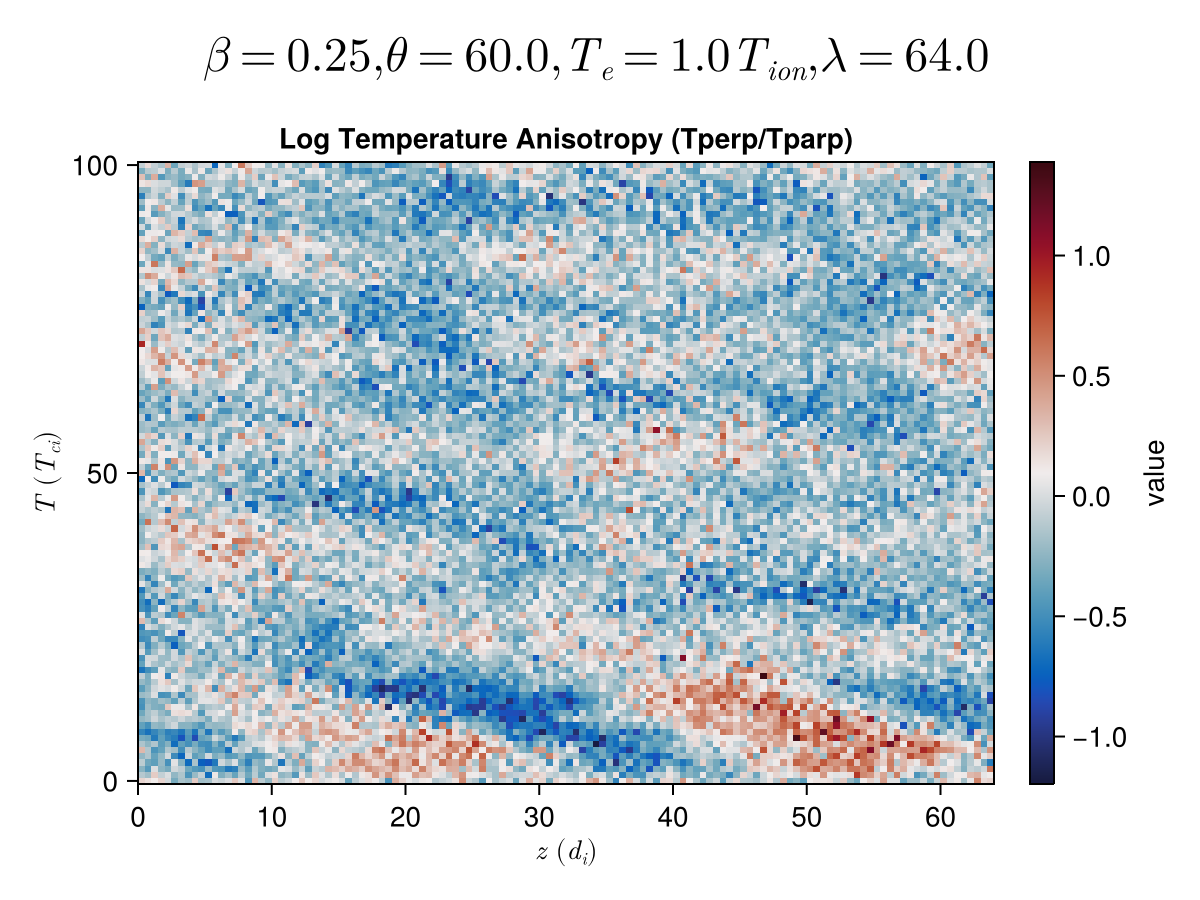

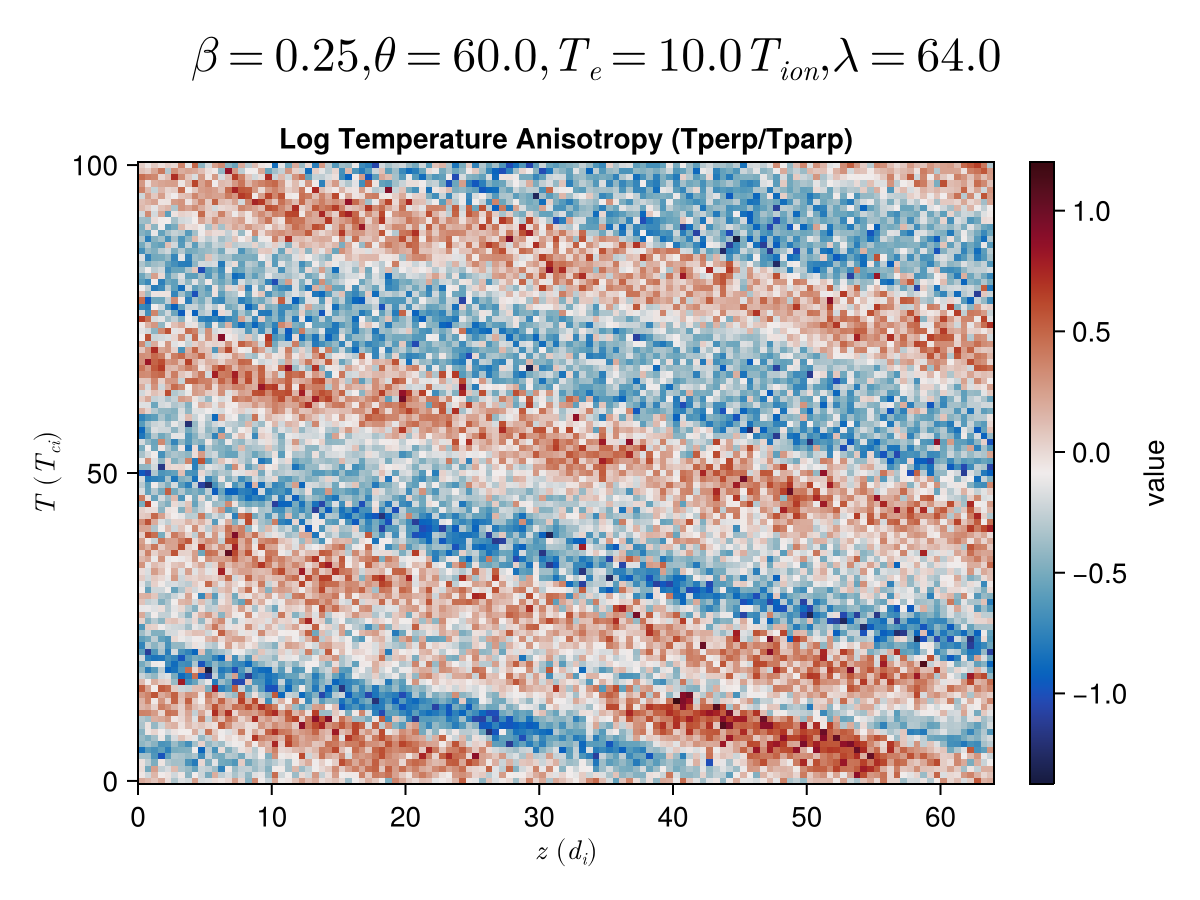

In [121]:
display.(figs[[1,2,3]]);

In [10]:
dim = 1
beta = 2.0
beta = 0.25
theta = 60.0
eta = 10.0

meta = setup(dim, beta, theta, eta)
df = load_field(meta);

UndefVarError: UndefVarError: `setup` not defined

In [11]:
df.Λ_temp

25856-element Vector{Float64}:
 1.1743376725205172
 0.8211958000387959
 0.9888189246945296
 1.038176743108648
 0.9112775155275304
 1.0483614764696185
 1.2513114687478306
 0.9406269742528499
 1.265988800435728
 0.9121869528976408
 ⋮
 1.1943909165262856
 1.4102756580298104
 1.2276640827249292
 1.2582323499395187
 1.1992463437859093
 1.2464404928764194
 1.321745561918275
 1.4842598861579053
 1.3494655140146103

In [31]:
plot_overview_ts(df; window=(; step=16),)

┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/figures/fields/time_0.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/figures/fields/time_16.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/figures/fields/time_32.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/figures/fields/time_48.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_0.25_theta_60.0_eta_10.0/figures/fie

In [116]:
if dim == 1
    z = :x
elseif dim== 2
    z = :y
else
    z = :z
end

:x

In [117]:
variables = [B_fields; E_field; j_field]

12-element Vector{String}:
 "Bx"
 "By"
 "Bz"
 "Bmag"
 "Ex"
 "Ey"
 "Ez"
 "Emag"
 "jx"
 "jy"
 "jz"
 "jMag"

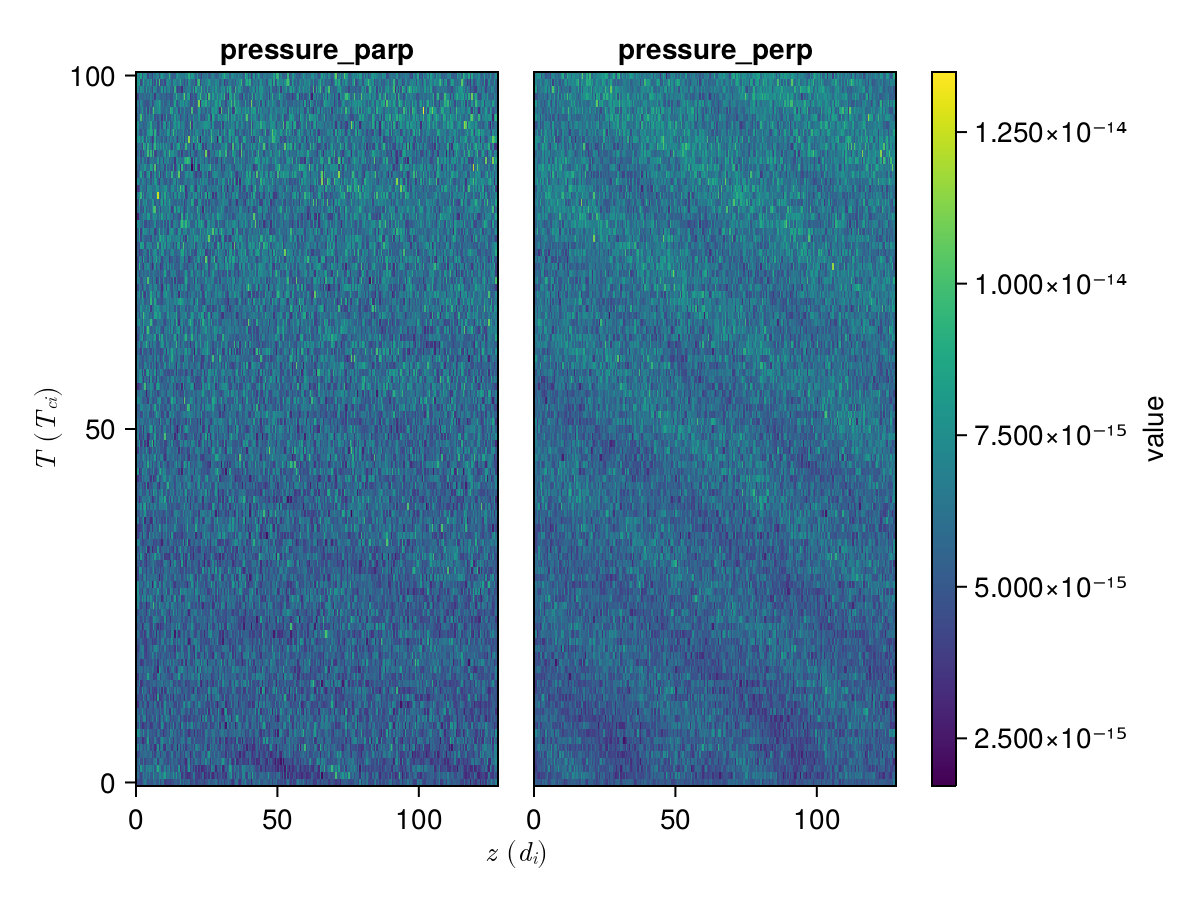

In [46]:
plot_fields(df, pressure_f_fields)
# easy_save("pressure_fields")

In [103]:
function plot_field(df, field; ids=ids)
    temp_df = stack(df, field, ids)
    data(temp_df) * mapping(:z_norm => z_norm_lab, :value, color=:variable) * visual(Lines)
end

plot_field (generic function with 1 method)

In [104]:
pressure_cols = names(df, r"pressure")
temp_cols = replace.(pressure_cols, r"pressure" => "T")

# Define a function for the transformation to avoid repetition
calculate_temperature = (p, rho) -> p ./ rho

# Use a loop to transform multiple pressure columns
for (pressure_col, temp_col) in zip(pressure_cols, temp_cols)
    transform!(df, [pressure_col, "rho"] => calculate_temperature => temp_col)
end

┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_2.0_theta_60.0_eta_10.0/fields/time_0.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_2.0_theta_60.0_eta_10.0/fields/time_15.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_2.0_theta_60.0_eta_10.0/fields/time_31.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_2.0_theta_60.0_eta_10.0/fields/time_47.0.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved /Users/zijin/projects/swd_simulation/warpx/01_oblique_linear_alfven/dim_1_beta_2.0_theta_60.0_eta_10.0/fields/time_63.0.png
└ @ beforerr /Users/zijin/.

In [10]:
vars = [:Bmag, :By, :rho, :p_zz, :T_z]
fig_options = (size=(2400, 700),)
facet = (; linkxaxes = :all, linkyaxes = :rowwise)

temp_df = df |> select_time $ window
plt = plot_fields_time(temp_df, vars)
plt *= mapping(col=:time_norm, row=:variable)
draw(plt; figure=fig_options, facet=facet)
# easy_save("B_time");

ArgumentError: ArgumentError: column name :p_zz not found in the data frame

In [ ]:
plot_fields_time(df, [:Bmag, :rho]; step=8, norm=true)
easy_save("B_rho_time")

In [ ]:
function plot_pressure_evolution(; cols = [:P_xx, :P_yy, :P_zz], norm=false)
    df = load_pressure_df()
    normalize_df!(df)
    temp_df = stack(df, cols, ids)

    if norm
        temp_df = @by temp_df :variable begin
            :value = :value / maximum(abs.(:value))
            :time_norm
            :z_norm
        end
    end

    data(temp_df) * mapping(ids..., :value, row = :variable => latexify) * visual(Heatmap) |> draw
end

plot_pressure_evolution()
easy_save("pressure_xyz")

In [ ]:
df = load_pressure_df()
describe(df)

In [ ]:
plot_pressure_evolution(cols = [:anisotropy], norm=false)
easy_save("pressure_anisotropy")

In [ ]:
plot_pressure_evolution(cols = [:p_parp, :p_perp], norm=true)
easy_save("pressure_perp_parp")

## Fluid fields

In [ ]:
file = "particle.arrow"
path = joinpath(dir, file)
df = path |> Arrow.Table |> DataFrame

In [ ]:
df.z_norm = df.particle_position_z / meta["d_i"]
df.py_norm = df.particle_momentum_y / 1e-25

In [145]:
plt = data(df) * mapping(:particle_position_z, :time,:particle_momentum_y) * visual(Heatmap)
draw(plt)

ArgumentError: ArgumentError: column name :particle_position_z not found in the data frame

### Non-binned particle data

In [ ]:
df.time_norm = CategoricalArray(df.time ./ meta["t_ci"])

In [ ]:
z_norm_edge = 0:1:240
py_norm_edge = -1e3:10:1e3

In [ ]:
datalimits_f = x -> quantile(x, [0.05, 0.95])

In [ ]:
fig_options = (size = (1200, 1000),)

plt = data(df) * mapping(:z_norm, :py_norm, layout=:time_norm) * histogram(datalimits=datalimits_f)
p = draw(plt; figure = fig_options)

## Parameters

In [ ]:
using Pkg
Pkg.add("Symbolics")

In [ ]:
using Symbolics

In [ ]:
@variables t x y μ_0 B ρ c n q m ϵ_0

Alfven_speed = B / sqrt(μ_0 * ρ)

# plasma frequency
ω_p = sqrt(n * q / (m * ϵ_0))
# inertial_length
d_i = c / ω_p

# gryofrequency
ω_c = q * B / m


simplify(ω_c / ω_p)

In [ ]:
ω_c / ω_p